In [1]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
from music_theory import sound, fft, fft4plot

%load_ext autoreload
%autoreload 2
%matplotlib inline

# 合成音色
## 实验2.1
### 2.1.1 高频振幅随$a_n = n^{-2}$递减

Text(0.5, 1.0, 'composed sound with overtone')

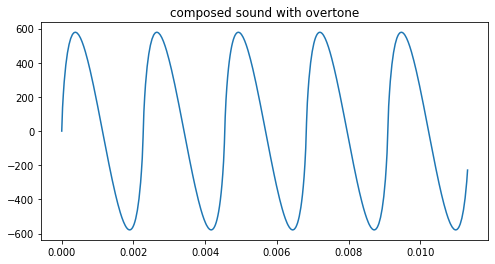

In [2]:
fs, f0 = 44100, 440
n = np.arange(50)+1
sigma = 0.7
t = np.arange(0,1, 1/fs)
gaussian = 1/np.sqrt(2*np.pi)/sigma*np.exp(-t*t/2/(sigma*sigma))
# an =n * np.exp(-n)
an = 1 / (n * n)
pitch = np.zeros(t.size)
for i in n:
    pitch += an[i-1] * np.sin(2 * np.pi * i * f0 * t)

pitch *= 1000 * gaussian # Convolution in frequecy domain
plt.figure(figsize=(8,4))
plt_size = 500
x = t[:plt_size]
y = pitch[:plt_size]
plt.plot(x, y)
plt.title('composed sound with overtone')

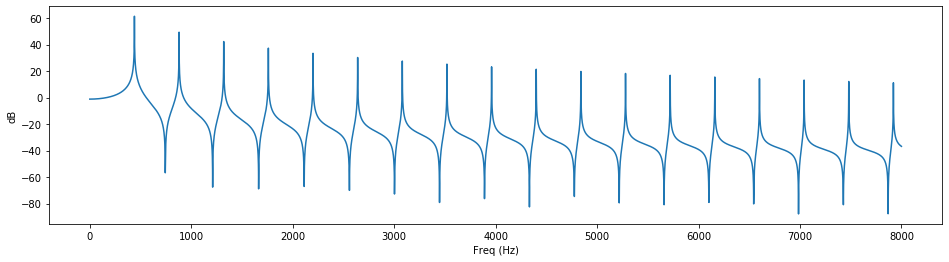

In [3]:
lgyf, freqs = fft4plot(pitch, fs, 8000)

plt.figure(figsize=(16,4))
plt.plot(freqs, lgyf)
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.show()

In [4]:
# compare composed tone with pure tone
sound(np.sin(2 * np.pi * f0 * t), fs)
sound(pitch, fs)

### 2.1.2 高频振幅随$a_n = n\exp(-n)$递减

Text(0.5, 1.0, 'composed sound with overtone')

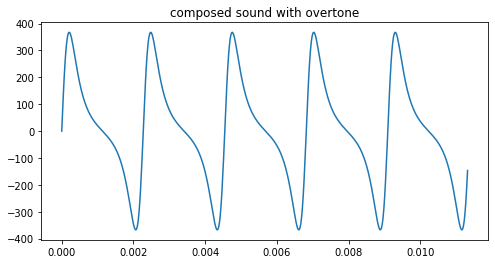

In [5]:
sigma = 0.7
t = np.arange(0,1, 1/fs)
gaussian = 1/np.sqrt(2*np.pi)/sigma*np.exp(-t*t/2/(sigma*sigma))
an = n * np.exp(-n)
an[0] *= 1
pitch = np.zeros(t.size)
for i in n:
    pitch += an[i-1] * np.sin(2 * np.pi * i * f0 * t)
pitch *= 1000 * gaussian # Convolution in frequecy domain
plt.figure(figsize=(8,4))
plt_size = 500
x = t[:plt_size]
y = pitch[:plt_size]
plt.plot(x, y)
plt.title('composed sound with overtone')


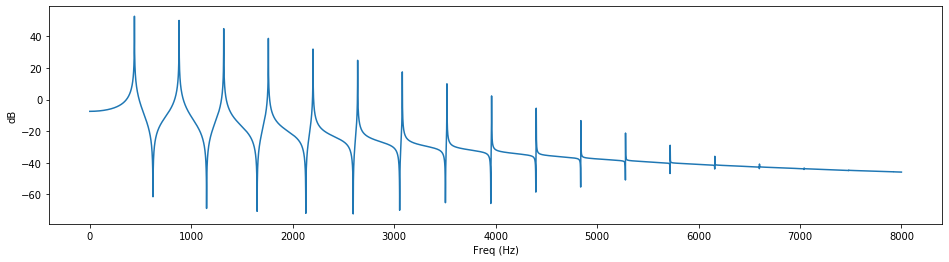

In [6]:
lgyf, freqs = fft4plot(pitch, fs, 8000)

plt.figure(figsize=(16,4))
plt.plot(freqs, lgyf)
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.show()

In [7]:
# compare composed tone with pure tone
sound(np.sin(2 * np.pi * f0 * t), fs)
sound(pitch, fs)

### 2.1.3 逆向合成钢琴音色

In [8]:
f = wave.open('resources/piano/A4.wav', 'rb')
bin_dat = f.readframes(f.getnframes())
decode =  np.array(struct.unpack('{}h'.format(f.getnframes()), bin_dat))
rate = f.getframerate()
f.close()

In [9]:
vol = np.max(decode) / (2**15)
sound(decode, rate, 0.5 if vol < 0.5 else vol)

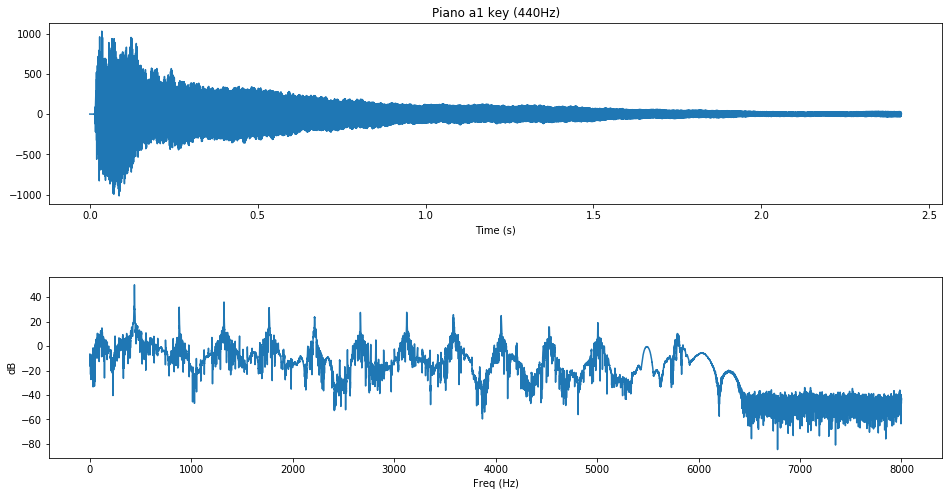

In [10]:
t_size = len(decode)
t = np.linspace(0, t_size / rate, t_size)
lgyf, freqs = fft4plot(decode, rate, 8000)
yf_r, _ = fft(decode, rate, 8000)

plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(t, decode)
plt.xlabel('Time (s)')
plt.title('Piano a1 key (440Hz)')
plt.subplot(212)
plt.plot(freqs, lgyf)
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.subplots_adjust(hspace=0.4)
plt.show()

Text(0.5, 1.0, 'composed sound with overtone')

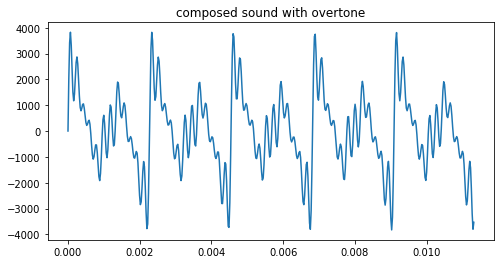

In [11]:
f0 = 440
t = np.arange(0, decode.size/fs, 1/fs)
sigma = 0.7
gaussian = 1/np.sqrt(2*np.pi)/sigma*np.exp(-t*t/2/(sigma*sigma))
pitch = np.zeros(decode.size)
n = np.arange(1, 15, 1)
an = np.zeros(n.size)
for i in n:
    an[i-1] = yf_r[int(f0 * i)]
    pitch += an[i-1] * np.sin(2 * np.pi * i * f0 * t)
pitch *= 1000 * gaussian
plt.figure(figsize=(8,4))
plt_size = 500
x = t[:plt_size]
y = pitch[:plt_size]
plt.plot(x, y)
plt.title('composed sound with overtone')

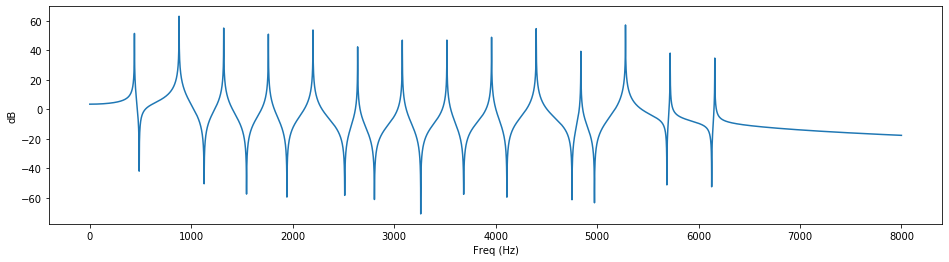

In [12]:
lgyf, freqs = fft4plot(pitch, rate, 8000)

plt.figure(figsize=(16,4))
plt.plot(freqs, lgyf)
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.show()

In [13]:
sound(decode, rate)
sound(pitch, rate)

Text(0.5, 1.0, 'composed sound with overtone')

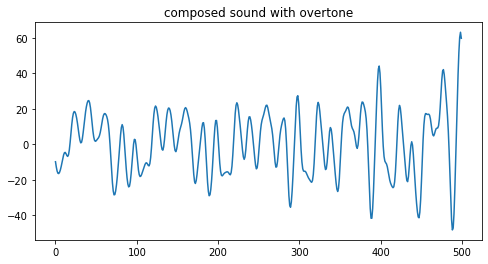

In [14]:
yf = np.fft.fft(decode)
r = 50
yf_ = np.zeros(yf.size, dtype='complex128')
scale = decode.size / rate
for i in np.arange(1, 14):
    for j in np.arange(-r, r):
        idx = int(f0 * i*scale) + j
        yf_[idx] = yf[idx]
recover = np.real(np.fft.ifft(yf_))
recover_t = np.arange(decode.size)

plt.figure(figsize=(8,4))
plt_size = 500
x = recover_t[:plt_size]
y = recover[:plt_size]
plt.plot(x, y)
plt.title('composed sound with overtone')

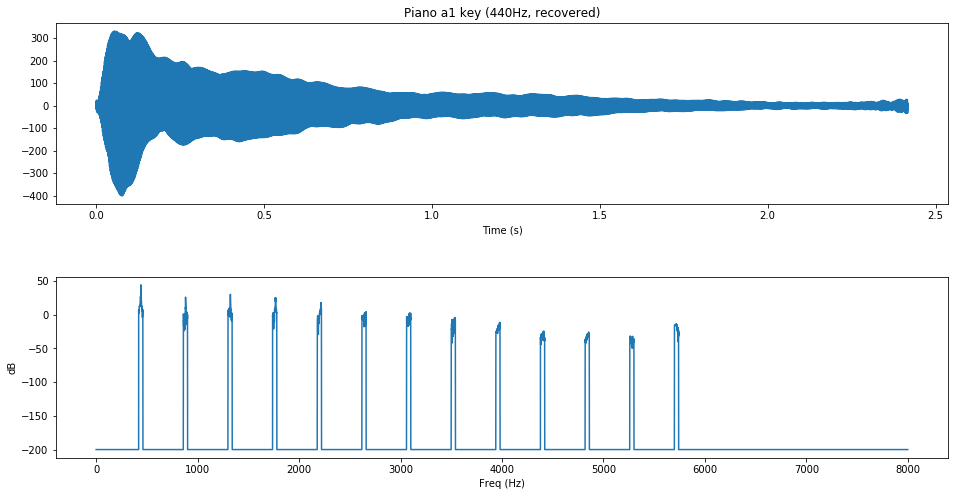

In [15]:
t_size = len(recover)
t = np.linspace(0, t_size / rate, t_size)
lgyf, freqs = fft4plot(recover, rate, 8000)

plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(t, recover)
plt.xlabel('Time (s)')
plt.title('Piano a1 key (440Hz, recovered)')
plt.subplot(212)
plt.plot(freqs, lgyf)
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [16]:
sound(decode, rate)
sound(recover, rate)

# 和声的和谐程度
## 实验2.2.1
$$\begin{aligned}
\left[a_0; a_1, a_2, a_3\right] = &a_0 + \frac{1}{a_1+\frac{1}{a_2+\frac{1}{a_3}}}\\
=&a_0 + \frac{1}{a_1+\frac{a_3}{1+a_2a_3}}\\
=&a_0 + \frac{1+a_2a_3}{a_3 + a_1 + a_1a_2a_3}\\
=&\frac{1+a_2a_3+a_0a_3+a_0a_1+a_0a_1a_2a_3}{a_3 + a_1 + a_1a_2a_3}\\
\end{aligned}$$

$$\begin{aligned}
\left[a_0; a_1, a_2\right] = &a_0 + \frac{1}{a_1+\frac{1}{a_2}}\\
=&a_0+\frac{a_2}{1+a_1a_2}\\
=&\frac{a_2+a_0+a_0a_1a_2}{1+a_1a_2}\\
\end{aligned}$$

$$\begin{aligned}
\frac{f_1}{f_0} = \frac{n_0}{n_1} \quad T = f_0n_0=n_0=1+a_2a_3+a_0a_3+a_0a_1+a_0a_1a_2a_3
\end{aligned}$$

In [17]:
def continue_frac(x, eps=1e-6):
    eps = np.fabs(eps)
    res = []
    while True:
        res += [np.floor(x)]
        x -= res[-1]
        if np.fabs(x) < eps: break
        x = 1 / x
    return res
pass

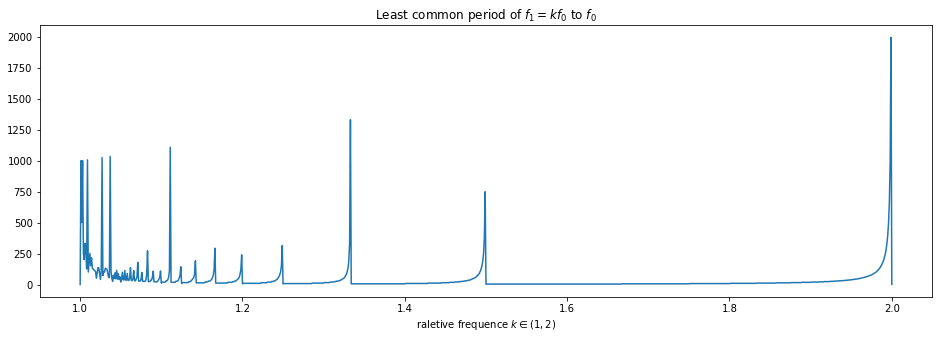

In [18]:
note = np.arange(1,2.001,0.001)
lcm = []
for n in note:
    c_frac = continue_frac(n, 1e-6)
    c_frac += [0,0,0]
    a = c_frac[0]*c_frac[1]+1
    b = c_frac[0]+c_frac[2]+c_frac[0]*c_frac[1]*c_frac[2]
#     p23 = c_frac[2]*c_frac[3]
#     c = 1+p23+c_frac[0]*c_frac[3]+(c_frac[0]*c_frac[1])*(1+p23)
    lcm += [a + b ]
plt.figure(figsize=(16,5))
plt.plot(note, lcm)
plt.xlabel('raletive frequence $k \in (1, 2)$')
# plt.ylabel('Least common period')
plt.title('Least common period of $f_1 = kf_0$ to $f_0$')
plt.show()

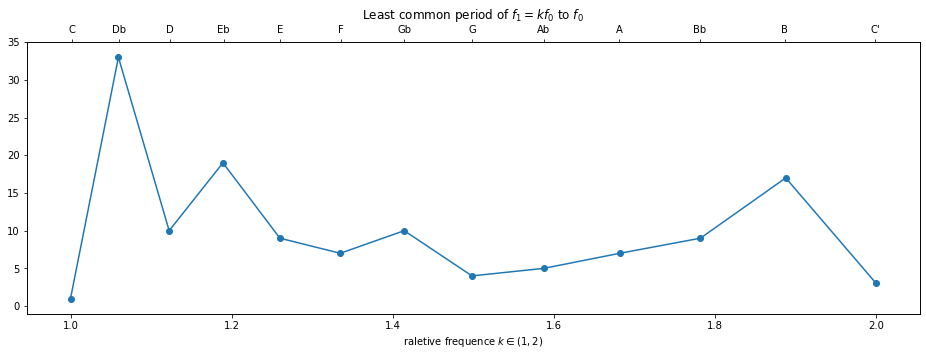

In [19]:
note2 = 2 ** (np.arange(0,13,1)/12)
lcm2 = [1]
i, r = 1, 5
lcm = np.array(lcm)
for n in note2[1:]:
    while i < note.size and note[i] < n: i = i + 1
    lcm2 += [lcm[i-r:i+r].min()]

pitches = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'C\'']
fig, ax1 = plt.subplots(figsize=(16,5))
ax2 = ax1.twiny()
ax1.plot(note2, lcm2)
ax1.scatter(note2, lcm2)
ax1.set_xlabel('raletive frequence $k \in (1, 2)$')
ax2.set_xticks(note2*0.9-0.85)
ax2.set_xticklabels(pitches)
plt.title('Least common period of $f_1 = kf_0$ to $f_0$')
plt.savefig('least_common_period.png')
plt.show()

## 实验2.2.2
可以看到，当频率相差一倍时，两个乐音之间的距离明显变小

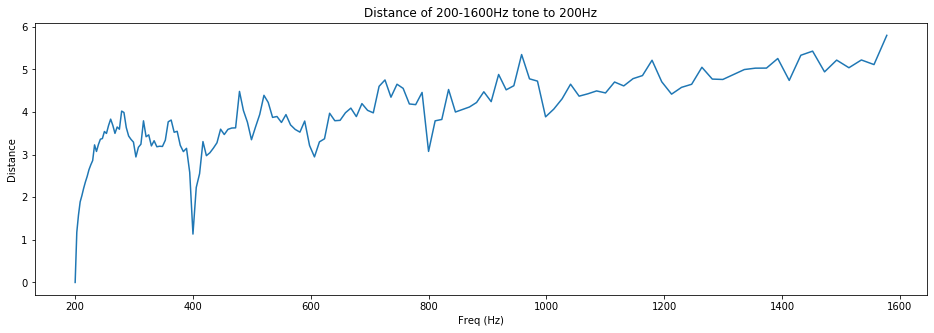

In [20]:
fs = 44100
n = np.arange(50)+1
an = n * np.exp(-n)
t = np.arange(0,1, 1/fs)
sigma = 0.7
gaussian = 1/np.sqrt(2*np.pi)/sigma*np.exp(-t*t/2/(sigma*sigma))
f_series = 200 * 2 ** (np.arange(150) / 50)
yf = []
for f in f_series:
    pitch = np.zeros(t.size)
    for i in n:
        pitch += an[i-1] * np.sin(2 * np.pi * i * f * t)
    pitch *= 1000 * gaussian
    yfi, _ = fft(pitch, fs, 0)
    yfi /= sum(yfi)
    yf += [yfi]
sim = []
for yfi in yf:
    sim += [sum(yfi * np.log(yfi/yf[0]))]
#     sim += [sum(yfi * yf[0])]
plt.figure(figsize=(16,5))
plt.plot(f_series, sim)
plt.xlabel('Freq (Hz)')
plt.ylabel('Distance')
plt.title('Distance of 200-1600Hz tone to 200Hz')
plt.show()

下面展示一个八度内的十二个标准音高，到C的距离(合成音)

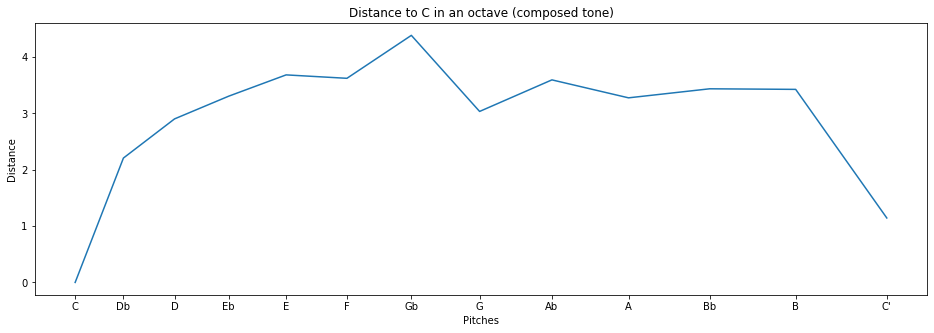

In [21]:
fs = 44100
n = np.arange(50)+1
an = n * np.exp(-n)
t = np.arange(0,1, 1/fs)
sigma = 0.7
gaussian = 1/np.sqrt(2*np.pi)/sigma*np.exp(-t*t/2/(sigma*sigma))
f_series = 262 * 2 ** (np.arange(13) / 12)
yf = []
for f in f_series:
    pitch = np.zeros(t.size)
    for i in n:
        pitch += an[i-1] * np.sin(2 * np.pi * i * f * t)
    pitch *= 1000 * gaussian
    yfi, _ = fft(pitch, fs, 0)
    yfi /= sum(yfi)
    yf += [yfi]
sim = []
for yfi in yf:
    sim += [sum(yfi * np.log(yfi/yf[0]))]
#     sim += [sum(yfi * yf[0])]
plt.figure(figsize=(16,5))
pitches = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'C\'']
x = np.arange(len(pitches))
plt.plot(f_series, sim)
plt.xticks(f_series, pitches)
plt.xlabel('Pitches')
plt.ylabel('Distance')
plt.title('Distance to C in an octave (composed tone)')
plt.show()

钢琴音

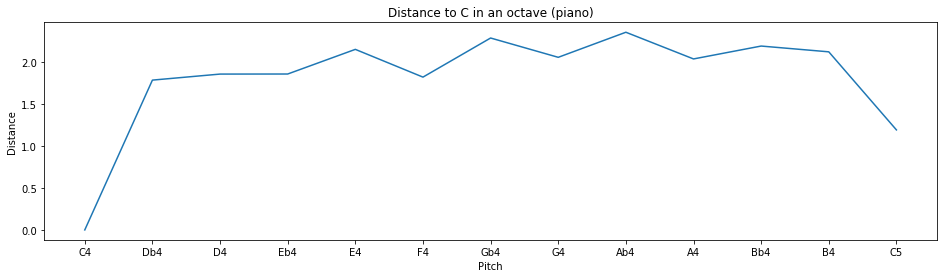

In [22]:
pitches = ['C4', 'Db4', 'D4', 'Eb4', 'E4', 'F4', 'Gb4', 'G4', 'Ab4', 'A4', 'Bb4', 'B4', 'C5']
yf = []
for p in pitches:
    f = wave.open('resources/piano/{}.wav'.format(p), 'rb')
    bin_dat = f.readframes(f.getnframes())
    decode = np.array(struct.unpack('{}h'.format(f.getnframes()), bin_dat))
    yfi, _ = fft(decode, f.getframerate(), 0)
    yfi /= sum(yfi)
    yf += [yfi]
    f.close()
sim = []
for yfi in yf:
    sim += [sum(yfi * np.log(yfi/yf[0]))]
plt.figure(figsize=(16,4))
x = np.arange(len(pitches))
plt.plot(x, sim)
plt.xticks(x, pitches)
plt.xlabel('Pitch')
plt.ylabel('Distance')
plt.title('Distance to C in an octave (piano)')
plt.show()